# Pymaceuticals Inc.
---

### Analysis

In this trial of treating SCC tumors in mice, 9 different drug regimens were tested against each other and a placebo. Of the 4 drugs in focus (Capomulin, Ramicane, Infubinol, and Ceftamin) it is clear that Capomulin and Ramicane were more effective in reducing tumor volume than Ifubinol or Ceftamin. These results are made clear by the boxplot comparing the final tumor volumes of mice treated with each of these regimens. An example mouse treated with Capomulin shows the decrease in tumor size over the duration of treatment. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')

# Display the data table for preview
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [2]:
# Checking the number of mice.
num_mice = len(study_data['Mouse ID'].unique())
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mouse = study_data[study_data.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()
duplicated_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_data = study_data[study_data.duplicated(['Mouse ID','Timepoint'], keep=False)]
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data[study_data['Mouse ID'] != duplicated_mouse[0]]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data['Mouse ID'].unique())
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen_data = clean_data.groupby(['Drug Regimen'])
vol_mean = regimen_data['Tumor Volume (mm3)'].mean()
vol_med = regimen_data['Tumor Volume (mm3)'].median()
vol_var = regimen_data['Tumor Volume (mm3)'].var()
vol_std = regimen_data['Tumor Volume (mm3)'].std()
vol_sem = regimen_data['Tumor Volume (mm3)'].sem()
stat_results = pd.DataFrame(data = {'Mean Tumor Volume': vol_mean, 
                                    'Median Tumor Volume': vol_med, 
                                    'Tumor Volume Variance': vol_var, 
                                    'Tumor Volume Std. Dev.': vol_std, 
                                    'Tumor Volume Std. Err.': vol_sem})
stat_results

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

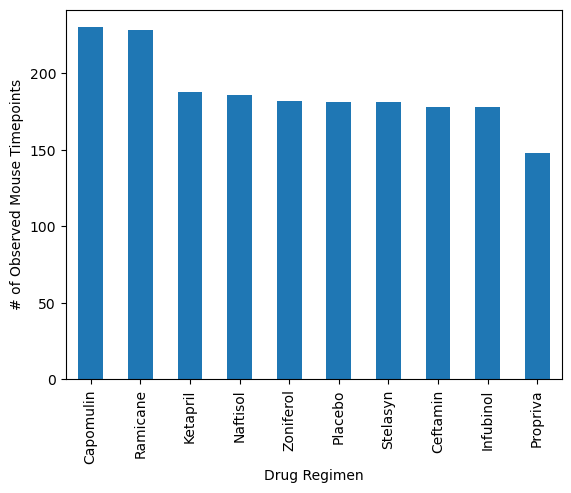

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per = regimen_data['Mouse ID'].count()
mice_per = mice_per.sort_values(ascending=False)
mice_per.plot.bar(xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints')

<function matplotlib.pyplot.show(close=None, block=None)>

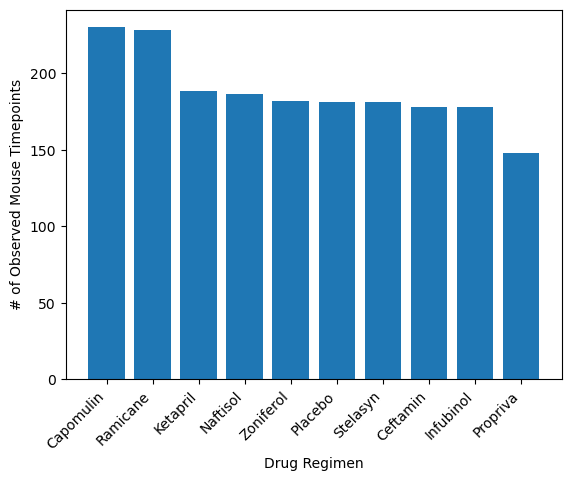

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_per.index.to_list()
mice_per_drug = mice_per.to_list()
plt.bar(drugs, mice_per_drug)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show

<Axes: ylabel='Count'>

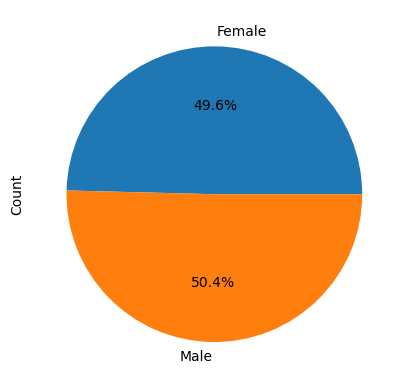

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
study_sex = clean_data.groupby(['Sex'])
female = len(study_sex['Mouse ID'].unique()['Female'])
male = len(study_sex['Mouse ID'].unique()['Male'])
sex_nums = pd.DataFrame(data={'Sex': ['Female', 'Male'], 'Count' : [female, male]})
# Make the pie chart
sex_nums.plot.pie(y='Count', labels=sex_nums['Sex'], autopct = '%1.1f%%', legend=False)

([<matplotlib.patches.Wedge at 0x1519aa060>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

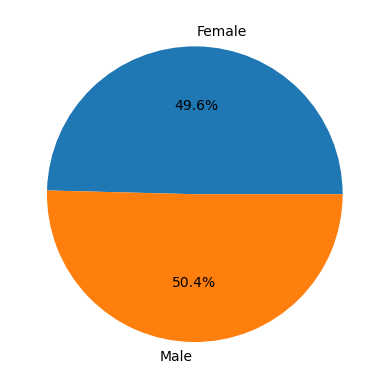

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(sex_nums['Count'], labels=sex_nums['Sex'], autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_subsets = clean_data[clean_data['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
drug_subsets = drug_subsets.loc[:,['Drug Regimen','Mouse ID','Timepoint']]
# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoints = drug_subsets.groupby(['Drug Regimen', 'Mouse ID'])
max_time_tumor = mouse_timepoints.max(['Timepoints'])
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#max_time_tumor.head(90)
drug_subsets_tumors = pd.merge(max_time_tumor, clean_data, on=['Mouse ID','Timepoint'], how='inner')
drug_subsets_tumors

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,s508,45,30.276232,0,Ramicane,Male,1,17
96,u196,45,40.667713,3,Ramicane,Male,18,25
97,w678,5,43.166373,0,Ramicane,Female,5,24
98,y449,15,44.183451,0,Ramicane,Male,19,24


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
rxs = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in rxs:
    outliers = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_vols = drug_subsets_tumors[drug_subsets_tumors['Drug Regimen']==drug]['Tumor Volume (mm3)']
    
    # add subset
    tumor_vols.append(final_vols)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_vols.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    outliers = final_vols[(final_vols < lowerq - (1.5*iqr)) | (final_vols > upperq + (1.5*iqr))] 
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


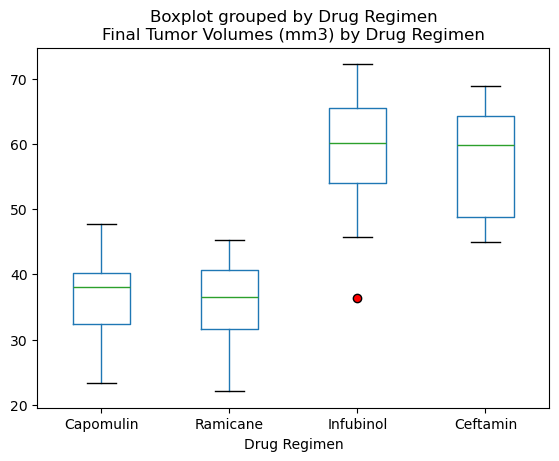

In [25]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
drug_subsets_tumors['Drug Regimen'] = pd.Categorical(drug_subsets_tumors['Drug Regimen'], categories=rxs, ordered=True)
drug_subsets_tumors.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, 
                            flierprops=dict(markerfacecolor='red'))
plt.title('Final Tumor Volumes (mm3) by Drug Regimen')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

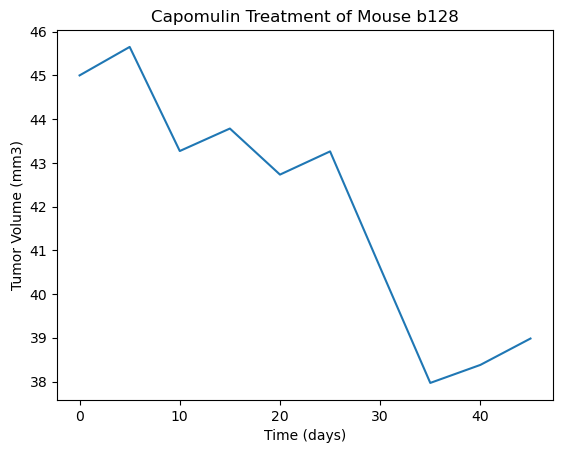

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = 'b128'
mouse_data = clean_data[clean_data['Mouse ID']==mouse]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse b128')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

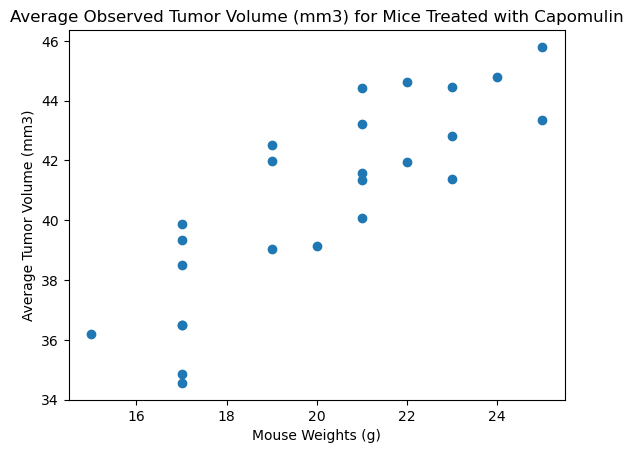

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_tumors = clean_data[clean_data['Drug Regimen']=='Capomulin']
cap_mice = cap_tumors.groupby(['Mouse ID'])
avg_tumor_vols = cap_mice['Tumor Volume (mm3)'].mean()
mouse_weights = cap_mice['Weight (g)'].mean()
plt.scatter(mouse_weights, avg_tumor_vols)
plt.title('Average Observed Tumor Volume (mm3) for Mice Treated with Capomulin')
plt.xlabel('Mouse Weights (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


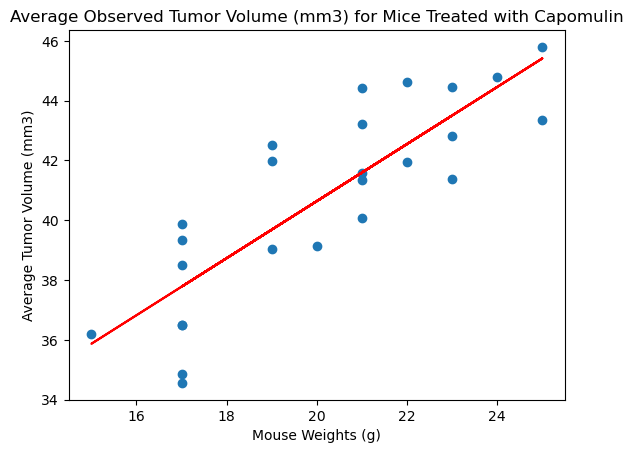

In [28]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, avg_tumor_vols)
regress_values = mouse_weights * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_coef, p_val = st.pearsonr(mouse_weights,avg_tumor_vols)
plt.scatter(mouse_weights,avg_tumor_vols)
plt.plot(mouse_weights,regress_values,"r-")
plt.title('Average Observed Tumor Volume (mm3) for Mice Treated with Capomulin')
plt.xlabel('Mouse Weights (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {round(corr_coef,2)}')